In [3]:
!pip install yfinance


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [20]:
start =  "2012-01-01"
end = "2022-12-21"

stock ="GOOG"
df = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


**DATA PRE PROCESSING**

In [21]:
df.reset_index(inplace=True)

In [22]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [23]:
moving_avg_100 = df.Close.rolling(100).mean()

The rolling function is used to perform rolling window calculations, such as moving averages

This line calculates a simple moving average with a window size of 100 for the 'Close' column in
your DataFrame df. The result will be a new Series (moving_avg_100) where each value represents the average
of the previous 100 'Close' values.

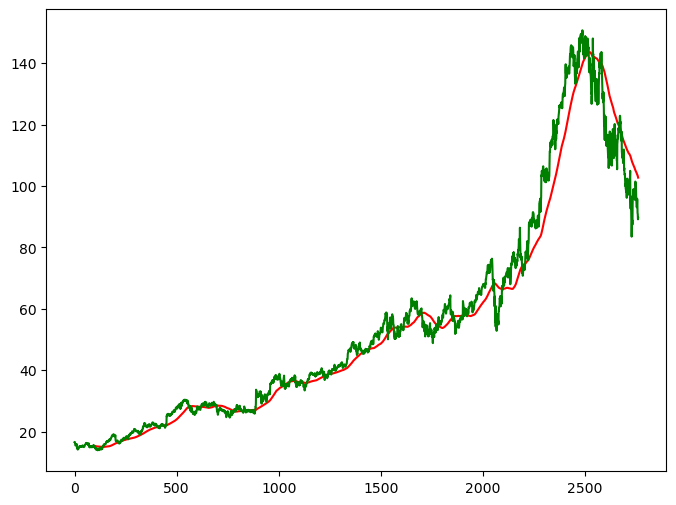

In [24]:
plt.figure(figsize=(8,6))
plt.plot(moving_avg_100,'r')
plt.plot(df.Close,'g')
plt.show()

In [25]:
moving_avg_200 = df.Close.rolling(200).mean()

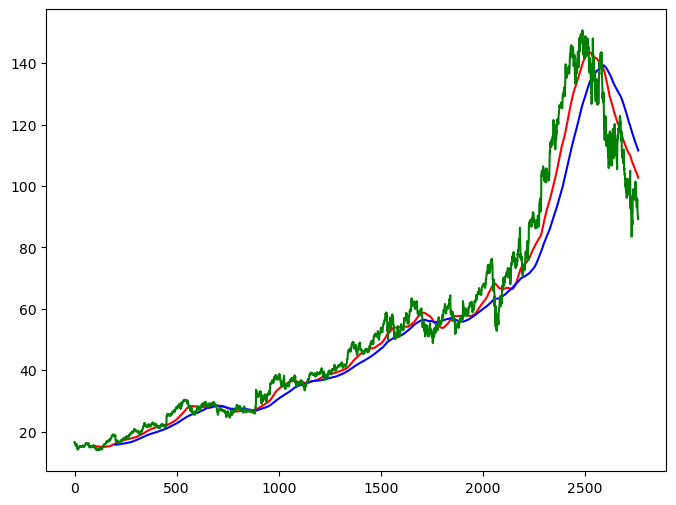

In [26]:
plt.figure(figsize=(8,6))
plt.plot(moving_avg_100,'r')
plt.plot(moving_avg_200,'b')
plt.plot(df.Close,'g')
plt.show()

In [27]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [35]:
df_train = pd.DataFrame(df.Close[0:int(len(df)*0.80)])
df_test = pd.DataFrame(df.Close[int(len(df)*0.80):len(df)])

In [37]:
df_train.shape[0]

2208

In [38]:
df_test.shape[0]

553


1. **MinMax Scaling:**
   - **Use Case:** MinMax Scaling (also known as Min-Max normalization) is used when you want to scale the features of your data to a specific range, typically between 0 and 1.
   - **Formula:** The formula for MinMax Scaling is given by:
     \[ X_{\text{new}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \]
   - **Advantages:** Maintains the relative relationships between data points, useful for algorithms sensitive to the scale of input features (e.g., neural networks).

2. **Normalization (L2 normalization):**
   - **Use Case:** Normalization is used when you want to scale the individual samples (rows) of your data to have a unit norm (i.e., normalize each sample to have a Euclidean norm of 1).
   - **Formula:** The formula for L2 normalization is given by:
     \[ X_{\text{new}} = \frac{X}{\|X\|_2} \]
   - **Advantages:** Useful when the magnitude of each sample is important, such as in distance-based algorithms like k-nearest neighbors.

3. **Standardization (Z-score normalization):**
   - **Use Case:** Standardization is used when you want to transform the data to have zero mean and unit variance. This is especially beneficial for algorithms that assume a Gaussian distribution of the input features.
   - **Formula:** The formula for standardization is given by:
     \[ X_{\text{new}} = \frac{X - \text{mean}(X)}{\text{std}(X)} \]
   - **Advantages:** Helps algorithms that are sensitive to the scale of input features and when features are on different scales. It makes the data more suitable for algorithms like linear regression and support vector machines.

**Thus we will do MIN MAX SCALING here**

- Use **MinMax Scaling** when you need to scale features to a specific range.
- Use **Normalization** when you want to scale individual samples to have a unit norm.
- Use **Standardization** when you want to transform the data to have zero mean and unit variance, making it suitable for algorithms assuming a Gaussian distribution or when dealing with models sensitive to feature scales.

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
df_train_scaled = scaler.fit_transform(df_train)

In [44]:
df_train_scaled.shape

(2208, 1)

In [45]:
x=[]
y=[]
for i in range(100,df_train_scaled.shape[0]):
    x.append(df_train_scaled[i-100:i])
    y.append(df_train_scaled[i,0])

the loop is sliding through the df_train_scaled array, creating input sequences (x) with 100 consecutive time steps (rows) and corresponding target values (y) representing the next time step's value after each sequence. This process is commonly used in time series forecasting to train models on historical data, where each sequence captures temporal dependencies in the data.

In [49]:
df_train_scaled[100,0]

0.01115973493069064

**MODEL BUILDING**

In [53]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [56]:
x,y=np.array(x),np.array(y)

In [58]:
x.shape

(2108, 100, 1)

In [65]:
x.shape[1],3

(100, 3)

In [67]:
model = Sequential()
model.add(LSTM(units=50, activation="relu" , return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu" , return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu" , return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu" ))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

In [68]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [69]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50

66/66 [==============================] - 23s 227ms/step - loss: 0.0322
Epoch 2/50
66/66 [==============================] - 15s 222ms/step - loss: 0.0078
Epoch 3/50
66/66 [==============================] - 14s 219ms/step - loss: 0.0071
Epoch 4/50
66/66 [==============================] - 15s 220ms/step - loss: 0.0056
Epoch 5/50
66/66 [==============================] - 14s 219ms/step - loss: 0.0048
Epoch 6/50
66/66 [==============================] - 15s 221ms/step - loss: 0.0051
Epoch 7/50
66/66 [==============================] - 15s 233ms/step - loss: 0.0048
Epoch 8/50
66/66 [==============================] - 15s 233ms/step - loss: 0.0050
Epoch 9/50
66/66 [==============================] - 16s 237ms/step - loss: 0.0044
Epoch 10/50
66/66 [==============================] - 16s 237ms/step - loss: 0.0039
Epoch 11/50
66/66 [==============================] - 15s 225ms/step - loss: 0.0044
Epoch 12/50
66/66 [==============================] - 16s 237ms/step - loss: 0.0037
Epoch 13/50


In [72]:
pass_100_days = df_train.tail(100)

In [73]:
df_test=pd.concat([pass_100_days,df_test],ignore_index=True)

In [81]:
df_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [78]:
df_test_scale = scaler.fit_transform(df_test)

In [80]:
df_test_scale

array([[0.02830229],
       [0.02593269],
       [0.03053898],
       [0.03452856],
       [0.03502425],
       [0.03435331],
       [0.04172204],
       [0.04347512],
       [0.0479483 ],
       [0.04623156],
       [0.03160285],
       [0.04744662],
       [0.05241549],
       [0.05818841],
       [0.064046  ],
       [0.02656139],
       [0.03220729],
       [0.0362393 ],
       [0.05006406],
       [0.05514178],
       [0.04597763],
       [0.04341461],
       [0.05558914],
       [0.06317545],
       [0.04356579],
       [0.04922377],
       [0.        ],
       [0.02119949],
       [0.03246722],
       [0.04723502],
       [0.0633508 ],
       [0.08209011],
       [0.07573083],
       [0.08227145],
       [0.09133275],
       [0.10992088],
       [0.09154434],
       [0.09712983],
       [0.09293465],
       [0.09557027],
       [0.0940892 ],
       [0.12441667],
       [0.12000381],
       [0.12609107],
       [0.09416778],
       [0.09186469],
       [0.10294508],
       [0.084

In [84]:
x=[]
y=[]
for i in range(100,df_test_scale.shape[0]):
    x.append(df_test_scale[i-100:i])
    y.append(df_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [85]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 80ms/step


In [86]:
y_predict
#as we can see the values are between 0 and 1 , now converting it back to actual values

array([[0.15159124],
       [0.15084285],
       [0.15084235],
       [0.15162219],
       [0.15312462],
       [0.15526746],
       [0.15786175],
       [0.16073751],
       [0.16382317],
       [0.16712281],
       [0.17066295],
       [0.17436525],
       [0.1781875 ],
       [0.18192835],
       [0.18542811],
       [0.18867156],
       [0.19170612],
       [0.19462973],
       [0.19769932],
       [0.2011502 ],
       [0.20513189],
       [0.20968972],
       [0.21474308],
       [0.22016838],
       [0.22581725],
       [0.23154907],
       [0.23722658],
       [0.24274415],
       [0.2479532 ],
       [0.2527329 ],
       [0.25695693],
       [0.260513  ],
       [0.26338843],
       [0.2656132 ],
       [0.26732725],
       [0.26863235],
       [0.26968876],
       [0.2707064 ],
       [0.27185035],
       [0.2732312 ],
       [0.27486938],
       [0.27671754],
       [0.27869278],
       [0.28071406],
       [0.28270113],
       [0.28452772],
       [0.286075  ],
       [0.287

In [91]:
scale = 1/scaler.scale_

In [92]:
y_predict = y_predict*scale

In [93]:
y = y*scale

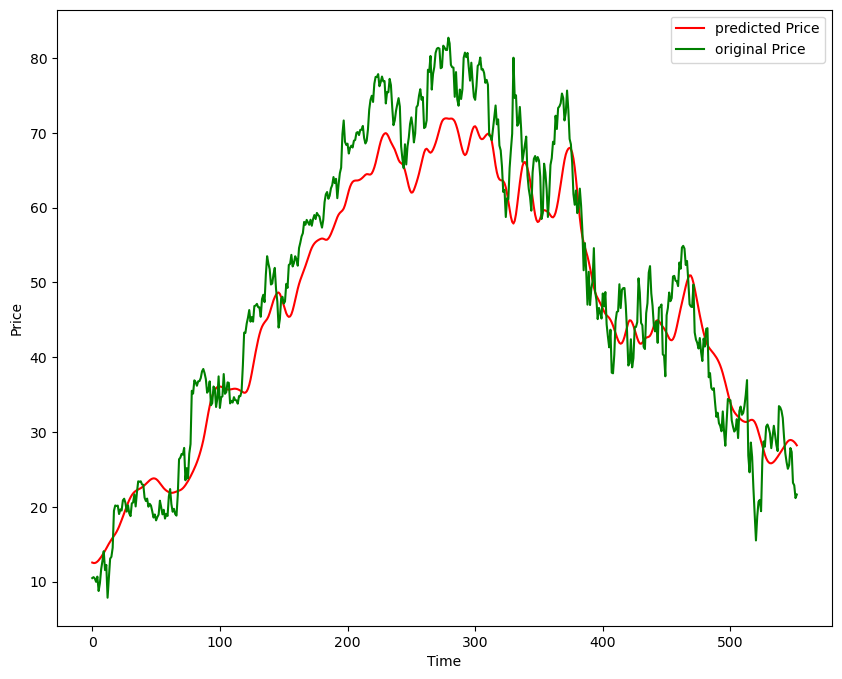

In [97]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='predicted Price')
plt.plot(y,'g',label='original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [98]:
model.save('Stock Predictions Model.Keras')

INFO:tensorflow:Assets written to: Stock Predictions Model.Keras\assets


INFO:tensorflow:Assets written to: Stock Predictions Model.Keras\assets
